In [1]:
import pandas as pd

invoices = pd.read_csv("fct_invoice.csv")
customers = pd.read_json("dim_customer.json")

In [2]:
print(invoices.columns)


Index(['invoice_no', 'customer_id', 'category', 'quantity', 'price',
       'payment_method', 'invoice_date', 'shopping_mall'],
      dtype='object')


In [3]:
print(customers.columns)

Index(['age', 'first_name', 'gender', 'id', 'last_name'], dtype='object')


In [4]:
# Easy 1 How many unique customers are in the dataset?
unique_customers = customers['id'].nunique()

unique_customers

5191

In [5]:
# Easy 2 What are the different categories of products available? 
categories = invoices['category'].unique()

categories

array(['Clothing', 'Shoes', 'Books', 'Cosmetics', 'Food & Beverage',
       'Toys', 'Technology', 'Souvenir'], dtype=object)

In [6]:
# Easy 2 How many unique categories are there?
num_categories = len(categories)

num_categories

8

In [7]:
# Easy 3 Which payment method is the most popular?
most_common_payment = invoices['payment_method'].value_counts().idxmax()

most_common_payment

'Cash'

In [8]:
# Easy 3 How many times was it used?
payment_count = invoices['payment_method'].value_counts().max()

clean_int = int(payment_count)
print(clean_int)

44447


In [9]:
# Medium 1 What are the three most popular categories, by total sales?
invoices['total'] = invoices['quantity'] * invoices['price']
category_sales = invoices.groupby('category')['total'].sum()
top_categories = category_sales.sort_values(ascending=False).head(3)

top_categories

category
Clothing      1.139968e+08
Shoes         6.655345e+07
Technology    5.786235e+07
Name: total, dtype: float64

In [10]:
# Medium 2 What are the total sales attributed to customers over the age of 45?
invoices['total'] = invoices['quantity'] * invoices['price']
merged = pd.merge(invoices, customers, left_on='customer_id', right_on='id')
over_45 = merged[merged['age'] > 45]
total_sales_over_45 = over_45['total'].sum()

clean_float = float(total_sales_over_45)
print(clean_float)

82039768.15


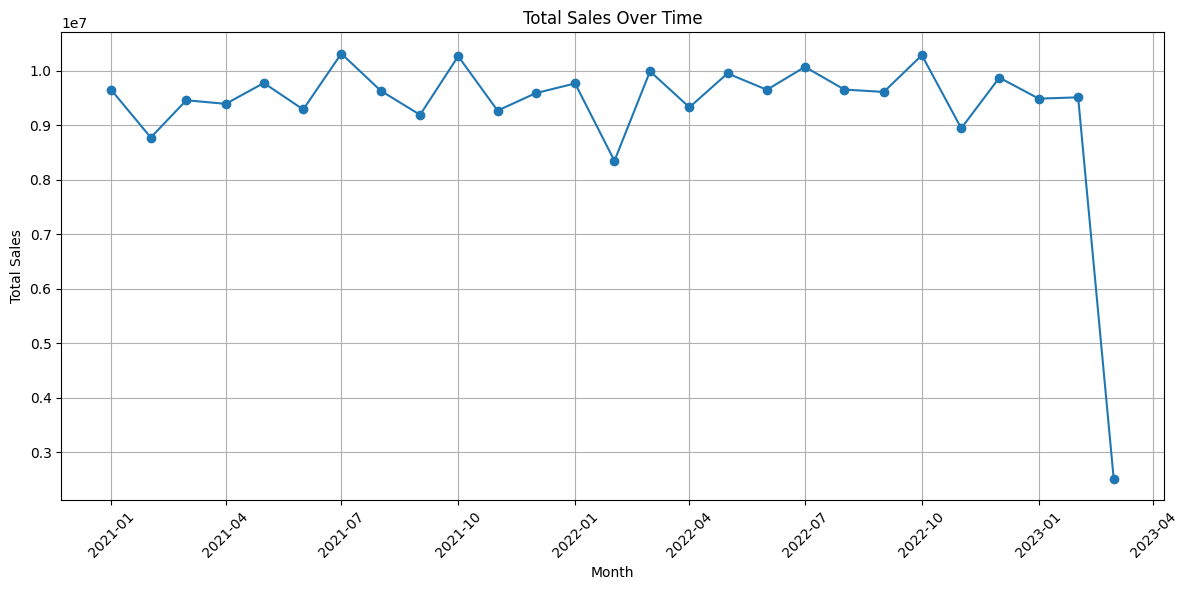

In [12]:
# Medium 3 How is the data distributed across different invoice dates? Are there any seasonal trends or patterns? (Use a graph for this.)
invoices['invoice_date'] = pd.to_datetime(invoices['invoice_date'], dayfirst=True)
invoices['month'] = invoices['invoice_date'].dt.to_period('M')

invoices['total'] = invoices['quantity'] * invoices['price']
monthly_sales = invoices.groupby('month')['total'].sum()


import matplotlib.pyplot as plt

monthly_sales.index = monthly_sales.index.to_timestamp()

plt.figure(figsize=(12, 6))
plt.plot(monthly_sales.index, monthly_sales.values, marker='o', linestyle='-')

plt.title('Total Sales Over Time')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



In [13]:
# Hard 1 Create a pivot table showing the breakdown of sales across these dimensions, in this order: category, decade age range (e.g., 10-19, 20-29, and so forth).
merged = pd.merge(invoices, customers, left_on='customer_id', right_on='id')
merged['age_group'] = (merged['age'] // 10) * 10
merged['age_group'] = merged['age_group'].astype(str) + '-' + (merged['age_group'] + 9).astype(str)
merged['total'] = merged['quantity'] * merged['price']

pivot = pd.pivot_table(
    merged,
    values='total',
    index='category',
    columns='age_group',
    aggfunc='sum',
    fill_value=0
)

pivot

age_group,10.0-19.0,20.0-29.0,30.0-39.0,40.0-49.0,50.0-59.0,60.0-69.0,70.0-79.0,80.0-89.0,nan-nan
category,,,,,,,,,
Books,12801.75,79461.75,84143.10,87203.40,74962.20,80476.80,54827.85,26664.00,334012.05
Clothing,1927413.84,10250732.80,11354126.96,11215189.92,10321851.76,10660642.08,7769371.28,4493698.00,46003764.40
Cosmetics,109619.36,605915.32,723544.70,665034.96,587780.96,649990.76,419082.62,254531.60,2777362.62
Food & Beverage,13582.31,73491.96,87246.86,89553.29,72425.04,80976.09,55050.98,31332.93,345875.59
Shoes,993281.35,5924878.24,7200839.66,7025590.02,5852857.84,5978893.54,4480269.05,2628744.60,26468097.17
Souvenir,12375.15,54943.32,64092.72,66391.80,54943.32,55025.43,38673.81,23718.06,265661.04
Technology,1129800.00,5261550.00,6159300.00,5954550.00,4435200.00,5471550.00,3638250.00,1946700.00,23865450.00
Toys,60426.24,385100.80,420582.40,390906.88,345067.52,363955.20,273244.16,153932.80,1587210.24
